## Employee Turnover Analytics 
                                        by Rodrigue Nya. 

__Portobello Tech has clearly understood that the workforce is a highly important asset and most likely the biggest one required to ensure all businesses' success. This is why this project arose to develop ML Programs that analyse employee metrics.__

## Step 1: Perform data quality check by checking for missing values if any.

__1.1. Import Required Libraries and Configure Settings__

- Import the pandas, NumPy, and matplotlib.pyplot libraries
- Configure matplotlib settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

__1.2. Load the Dataset__

- Load the data set Mall_customers.csv
- Display the first few rows of the data set
- Extract the necessary columns and store them in a variable called df

In [2]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


__Observations:__
- Here, we are using customer data from employees' satisfaction levels.
- We have their satisfaction level, last evaluation, number of projects, average montly hours, time spent, work accidents, left, promotion last 5years, sales, and salary.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


__Observation:__
- Here, we can see that there are non-null values or no missing values.

In [5]:
df.shape

(14999, 10)

__1.3.	Performing data quality check by checking for missing values if any__

In [6]:
#checking missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## Step 2 : Understand what factors contributed most to employee turnover by EDA.

__2.1.	Drawing a heatmap of the Correlation Matrix between all numerical features/columns in the data__

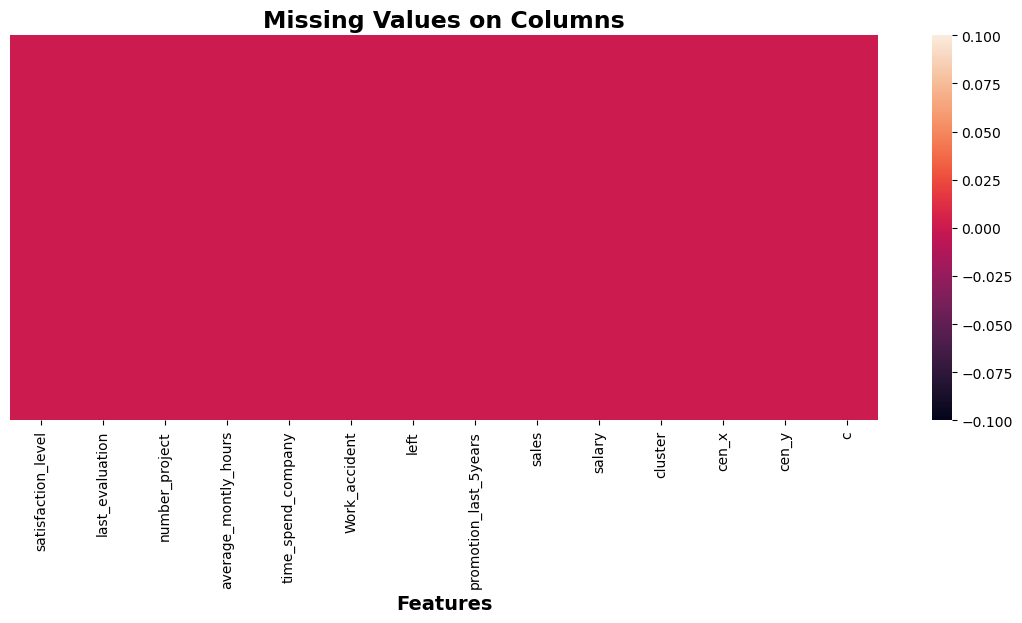

In [128]:
#checking missing values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),cbar=True,yticklabels=False)
plt.xlabel("Features",size=14,weight="bold")
plt.title("Missing Values on Columns",fontweight="bold",size=17)
plt.show()

In [24]:
# Summary statistics for the numerical features
data= df
summary_statistics = df.describe()

__2.2.	Draw the distribution plot of satisfaction_level, last_evaluation and average_montly_hours__

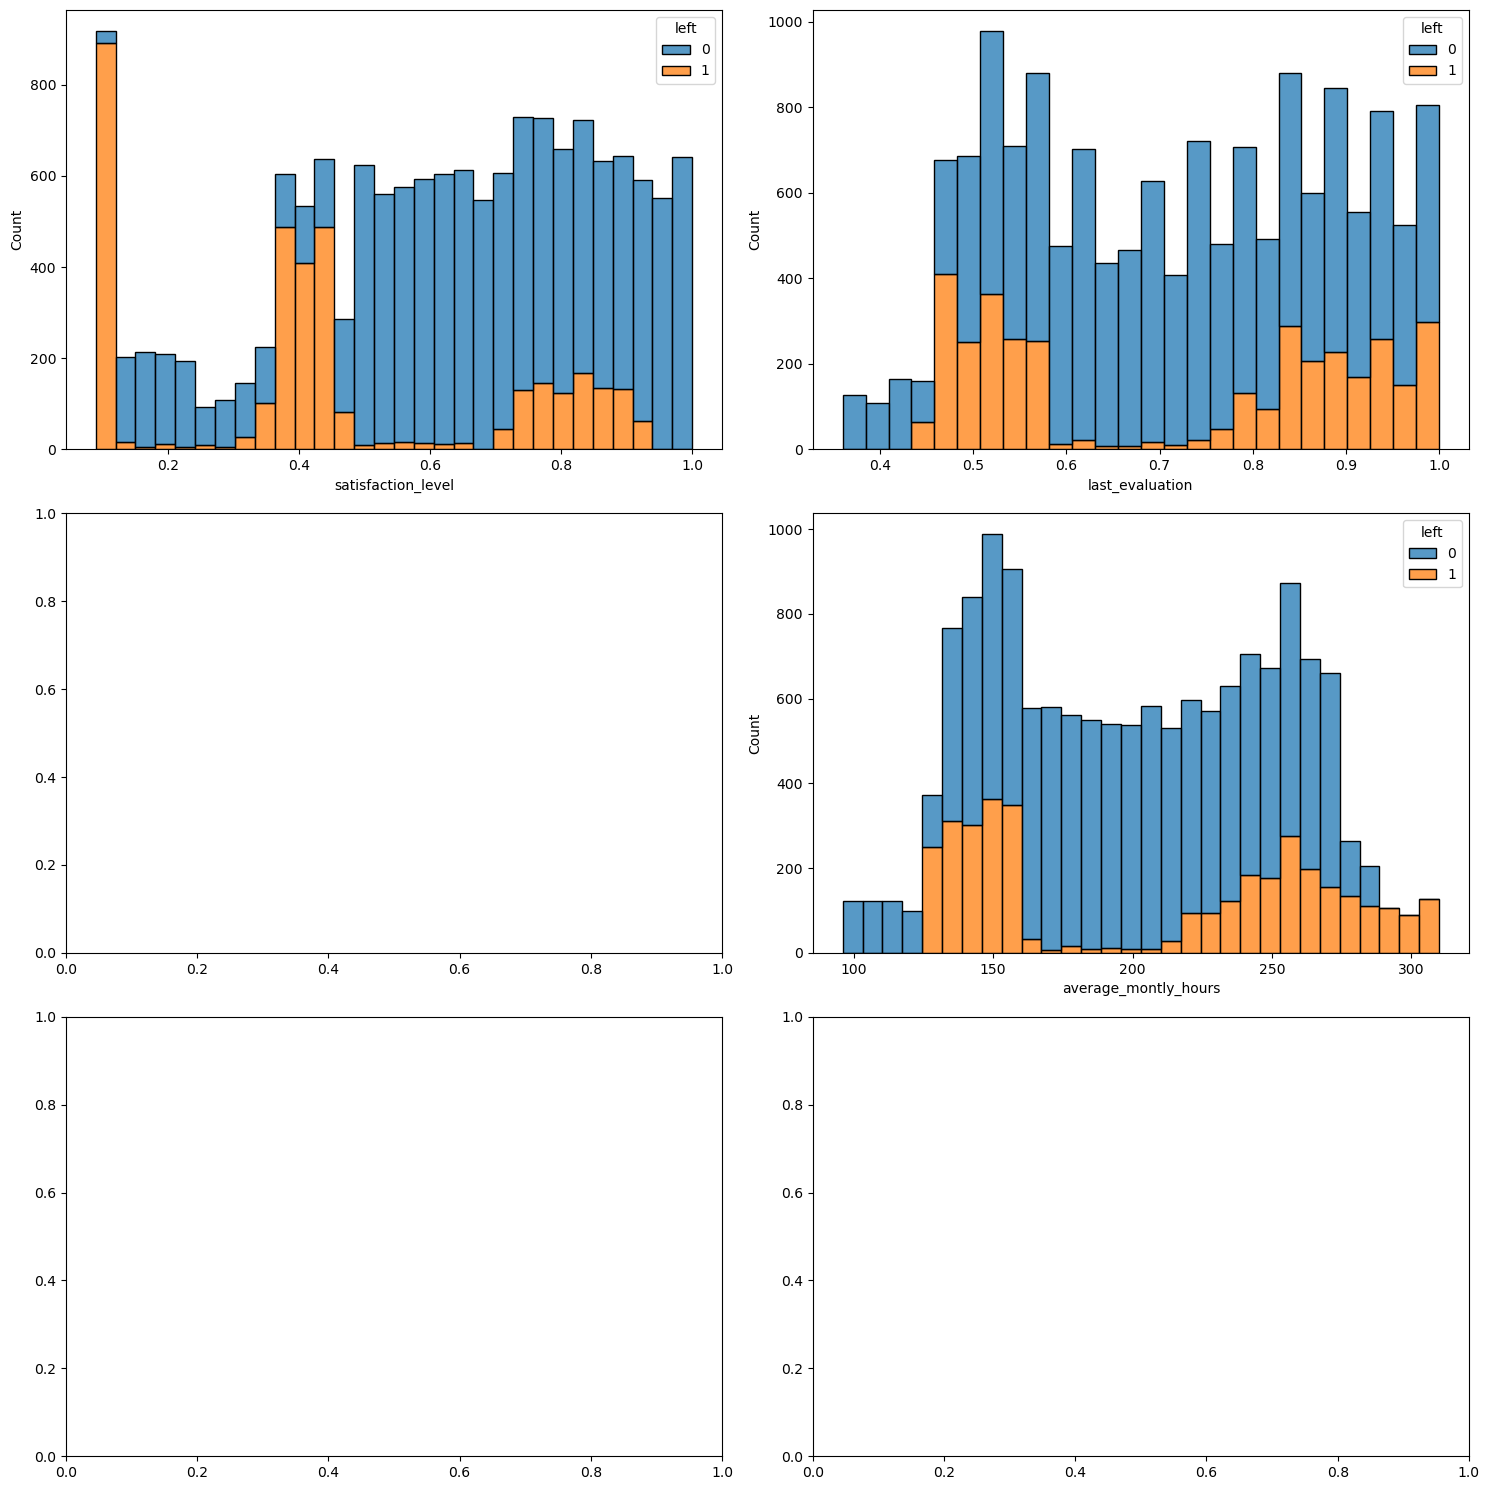

(       satisfaction_level  last_evaluation  number_project  \
 count        14999.000000     14999.000000    14999.000000   
 mean             0.612834         0.716102        3.803054   
 std              0.248631         0.171169        1.232592   
 min              0.090000         0.360000        2.000000   
 25%              0.440000         0.560000        3.000000   
 50%              0.640000         0.720000        4.000000   
 75%              0.820000         0.870000        5.000000   
 max              1.000000         1.000000        7.000000   
 
        average_montly_hours  time_spend_company  Work_accident          left  \
 count          14999.000000        14999.000000   14999.000000  14999.000000   
 mean             201.050337            3.498233       0.144610      0.238083   
 std               49.943099            1.460136       0.351719      0.425924   
 min               96.000000            2.000000       0.000000      0.000000   
 25%              156.0000

In [127]:
# Visualize the distribution of numerical features in relation to the 'left' column
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(data=data, x='satisfaction_level', hue='left', multiple='stack', ax=ax[0, 0])
sns.histplot(data=data, x='last_evaluation', hue='left', multiple='stack', ax=ax[0, 1])
sns.histplot(data=data, x='average_montly_hours', hue='left', multiple='stack', ax=ax[1, 1])

# Remove the empty subplot (if any)
for i in range(2):
    for j in range(2):
        if i == 2 and j == 1:
            fig.delaxes(ax[i][j])
# Adjust layout
plt.tight_layout()

summary_statistics, plt.show()

__Observation:__

-  From the distribution plot, we can deduce that the satisfaction level, number of projects, average montly hours, time spent in the company, and last evaluation, are significant factors to be considered for predicting employee turnover.

__2.3. Draw the bar plot of Employee Project count__

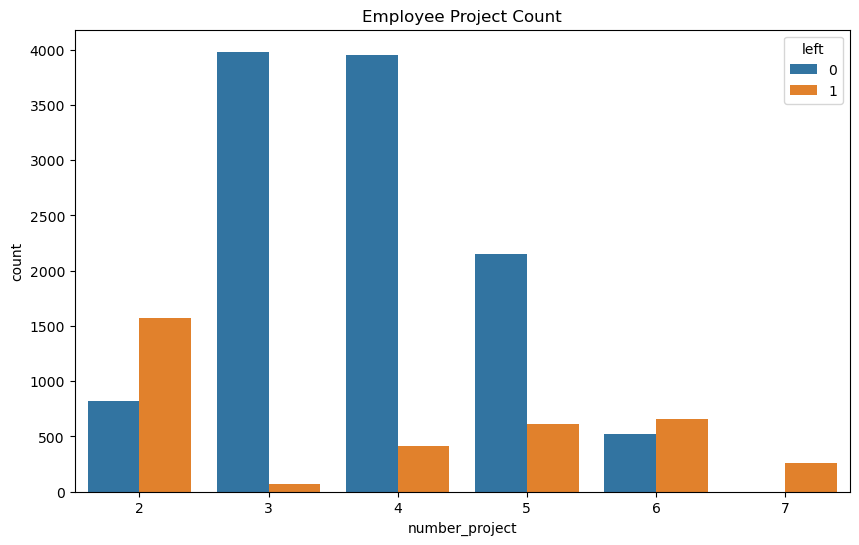

In [27]:
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=data, x='number_project', hue='left')

# Add a title to the plot
bar_plot.set_title('Employee Project Count')

plt.show()

__Observations:__

-  The majority of employees who have stayed with the company are involved in 3 to 5 projects.

-  There is a notable peak in turnover among employees with 2 projects and those with 6 projects. This could indicate issues such as burnout or lack of engagement and progression opportunities.

-  A relatively small number of employees who have stayed are involved in 6 to 7 projects, which could imply that such a workload is not sustainable in the long run.

## Step 3: Perform clustering of Employees who left based on their satisfaction and evaluation.

__3.1. Choose columns satisfaction_level, last_evaluation and left.__
- Create a scatter plot with satisfaction_level and last_evaluation as x and y axes
- Create a scatter plot with satisfaction_level and last_evaluation as x and y axes and speed as size


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['satisfaction_level', 'last_evaluation']])
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

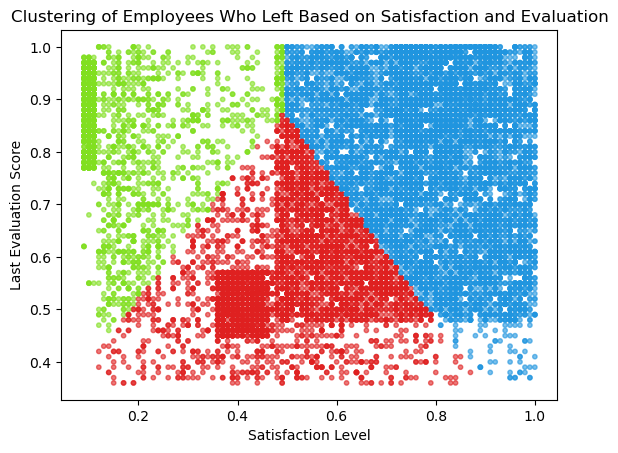

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Clustering of Employees Who Left Based on Satisfaction and Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.scatter(df.satisfaction_level , df.last_evaluation, c=df.c, alpha = 0.6, s=10)

__Observations:__
- Cluster output with K = 3
- We can see that there are three different clusters with three different colors.

__3.2. Do KMeans clustering of employees who left the company into 3 clusters.__

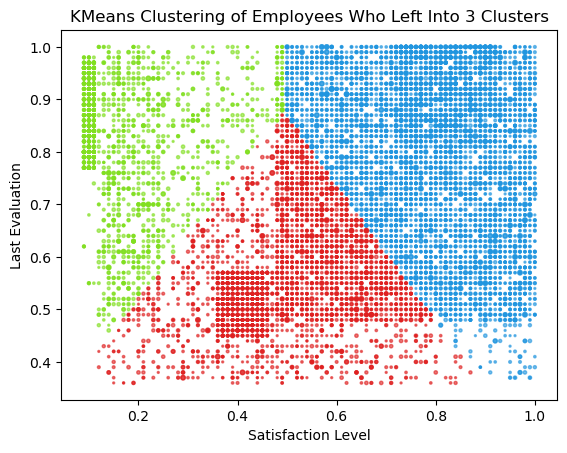

In [32]:
plt.title('KMeans Clustering of Employees Who Left Into 3 Clusters')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.scatter(df.satisfaction_level, df.last_evaluation, c=df.c, s=df.time_spend_company, alpha = 0.6)

__Observations:__

- High Satisfaction - High Evaluation: Employees in this cluster generally have high satisfaction and high evaluation scores.

- Low Satisfaction - High EvaluationThis: This Cluster includes employees who have high evaluation scores but low satisfaction.

- Low Satisfaction - Low Evaluation: Employees in this cluster have low satisfaction and low evaluation scores.

__Understanding these clusters can help a company address different reasons why employees are leaving and take appropriate actions, such as:__

- Offering career development and advancement opportunities for high performers.

- Ensuring a healthy work-life balance and recognising the efforts of high-evaluated employees.

- Providing support and training for those who struggle to perform, and ensuring the right fit for the role.


## Step 4: Handle the left Class Imbalance using SMOTE technique.


- Import and use oversampling from SMOTE
- Once imported, transform the same using the features and labels df.

In [13]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.6 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


__4.1.	Pre-Process the data by converting categorical columns to numerical columns by:__ 

- Separating categorical variables and numeric variables.

- Applying get_dummies() to the categorical variables.

- Combining categorical variables and numeric variables.


In [33]:
from imblearn.over_sampling import SMOTE

In [52]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

numeric_data.head(), categorical_data.head()

(   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
 0                0.38             0.53               2                   157   
 1                0.80             0.86               5                   262   
 2                0.11             0.88               7                   272   
 3                0.72             0.87               5                   223   
 4                0.37             0.52               2                   159   
 
    time_spend_company  Work_accident  left  promotion_last_5years     cen_x  \
 0                   3              0     1                      0  0.500085   
 1                   6              0     1                      0  0.795849   
 2                   4              0     1                      0  0.182241   
 3                   5              0     1                      0  0.795849   
 4                   3              0     1                      0  0.500085   
 
       cen_y  
 0  0.560099  


In [53]:
categorical_data_dummies = pd.get_dummies(categorical_data)
categorical_data_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,c_#2095DF,c_#81DF20,c_#DF2020
0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True


In [61]:
combined_data = pd.concat([numeric_data, categorical_data], axis=1)
combined_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,cen_x,cen_y,sales,salary,c
0,0.38,0.53,2,157,3,0,1,0,0.500085,0.560099,sales,low,#DF2020
1,0.80,0.86,5,262,6,0,1,0,0.795849,0.788327,sales,medium,#2095DF
2,0.11,0.88,7,272,4,0,1,0,0.182241,0.822398,sales,medium,#81DF20
3,0.72,0.87,5,223,5,0,1,0,0.795849,0.788327,sales,low,#2095DF
4,0.37,0.52,2,159,3,0,1,0,0.500085,0.560099,sales,low,#DF2020


__4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.__

In [59]:
from sklearn.model_selection import train_test_split
X = preprocessed_data.drop('left', axis=1)
y = preprocessed_data['left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=123, 
    stratify=y) 
    
# The X_train, X_test, y_train, y_test contain the split data
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((11999, 26), (11999,)), ((3000, 26), (3000,)))

__4.3.Upsample the train dataset using SMOTE technique from the imblearn module.__

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cluster,cen_x,cen_y,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,c_#2095DF,c_#81DF20,c_#DF2020
0,0.15,0.39,5,229,4,0,0,0,0.500085,0.560099,...,False,True,False,False,False,True,False,False,False,True
1,0.09,0.81,6,257,4,0,0,1,0.182241,0.822398,...,False,False,True,False,False,True,False,False,True,False
2,0.57,0.49,2,237,2,0,0,0,0.500085,0.560099,...,False,False,True,False,False,True,False,False,False,True
3,0.85,0.59,2,264,2,0,0,2,0.795849,0.788327,...,False,False,True,False,False,True,False,True,False,False
4,0.16,0.72,4,192,6,0,0,1,0.182241,0.822398,...,False,True,False,False,True,False,False,False,True,False


In [68]:
y_train_smote.value_counts()

left
0    9142
1    9142
Name: count, dtype: int64

## Step 5: Perform 5-Fold cross-validation model training and evaluate performance.

__5.1. Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.__

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

In [74]:
logreg = LogisticRegression()
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
cv_results = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='accuracy')
cv_scores = cross_val_score(logreg, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
print(f'CV Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})')

/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

CV Accuracy: 0.80 (+/- 0.01)


/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [75]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(logreg, X_train_smote, y_train_smote, cv=cv)
print(classification_report(y_train_smote, y_pred))

/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

              precision    recall  f1-score   support

           0       0.83      0.74      0.79      9142
           1       0.77      0.85      0.81      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

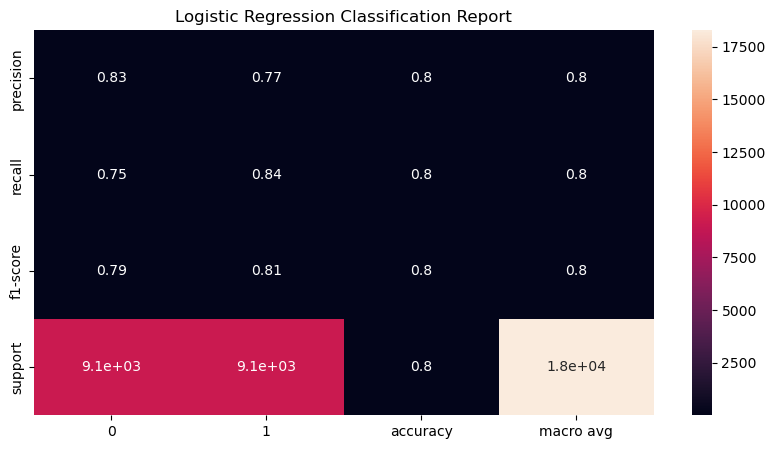

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd

logreg = LogisticRegression()
y_pred = cross_val_predict(logreg, X_train_smote, y_train_smote, cv=5)
report = classification_report(y_train_smote, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Create a heatmap from the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True)
plt.title('Logistic Regression Classification Report')
plt.show()

__5.2. Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.__

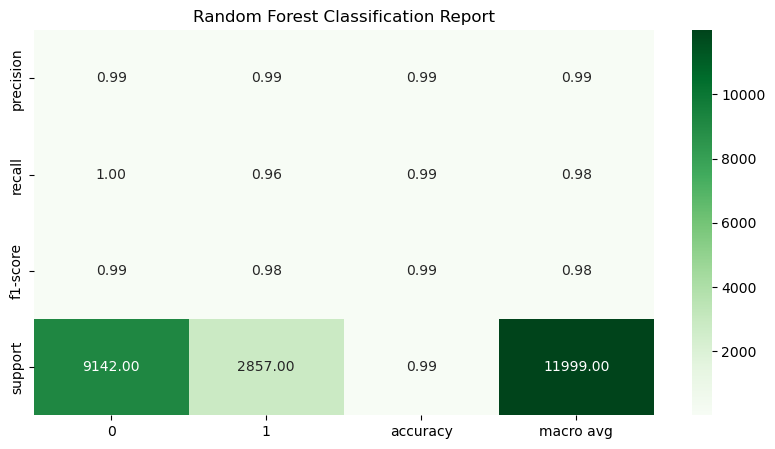

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

rf_clf = RandomForestClassifier(random_state=123)
y_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=5)
report_rf = classification_report(y_train, y_pred_rf, output_dict=True)

# Convert the report to a DataFrame
report_rf_df = pd.DataFrame(report_rf).transpose()

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(report_rf_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Greens')
plt.title('Random Forest Classification Report')
plt.show()

__5.3. Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.__

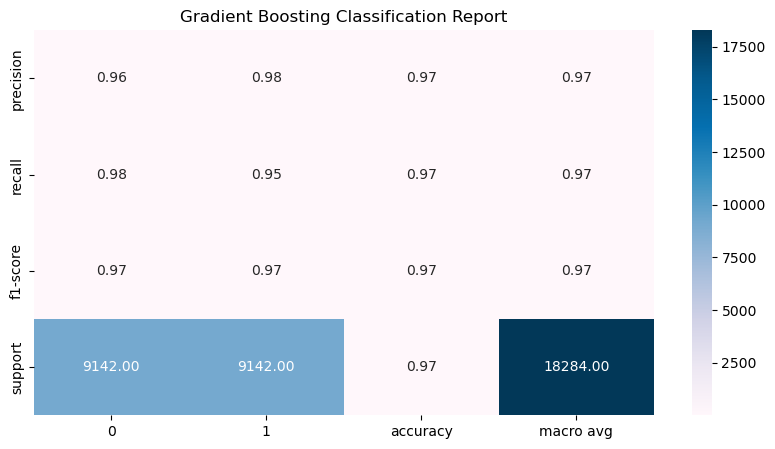

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

gb_clf = GradientBoostingClassifier(random_state=123)
y_pred_gb = cross_val_predict(gb_clf, X_train_smote, y_train_smote, cv=5)
report_gb = classification_report(y_train_smote, y_pred_gb, output_dict=True)

# Convert the report to a DataFrame
report_gb_df = pd.DataFrame(report_gb).transpose()

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(report_gb_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='PuBu')
plt.title('Gradient Boosting Classification Report')
plt.show()

## Step 6: Identify the best model and justify the evaluation metrics used.

__6.1. Find the ROC/AUC for each model and plot the ROC curve.__

/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

<Figure size 1000x800 with 0 Axes>

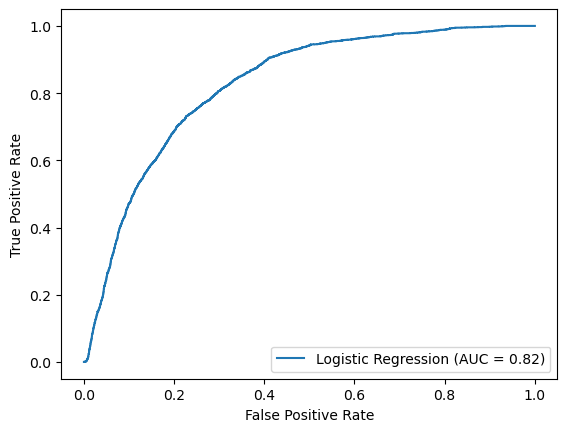

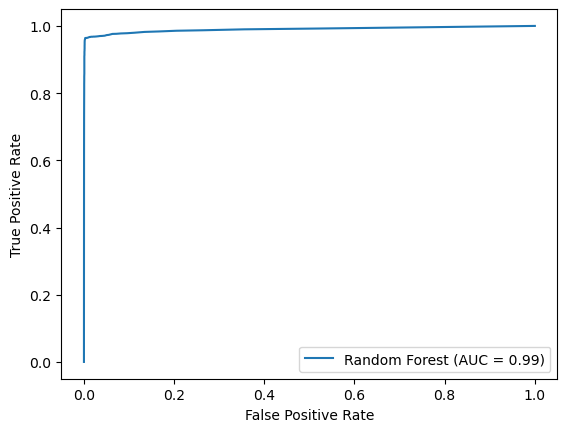

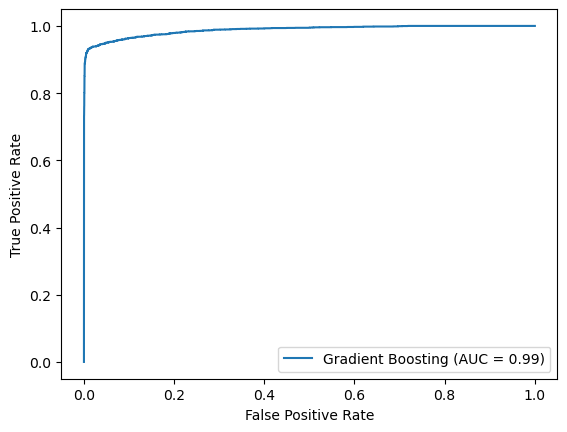

In [84]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import RocCurveDisplay

logreg = LogisticRegression()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Function to calculate ROC AUC and plot ROC curve for a given model
def plot_roc_curve(model, X, y, name):
    # Predict probabilities for the positive class (class 1)
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot()

# Calculate and plot ROC curves
plt.figure(figsize=(10, 8))

plot_roc_curve(logreg, X_train, y_train, 'Logistic Regression')

plot_roc_curve(rf_classifier, X_train, y_train, 'Random Forest')

plot_roc_curve(gb_classifier, X_train, y_train, 'Gradient Boosting')

plt.show()

__6.2.	Find the confusion matrix for each of the models.__

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rodnya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

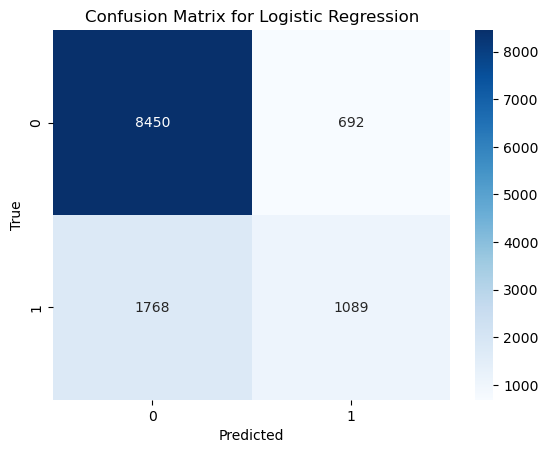

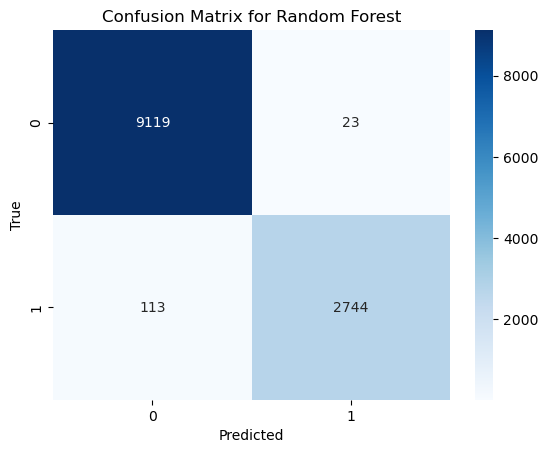

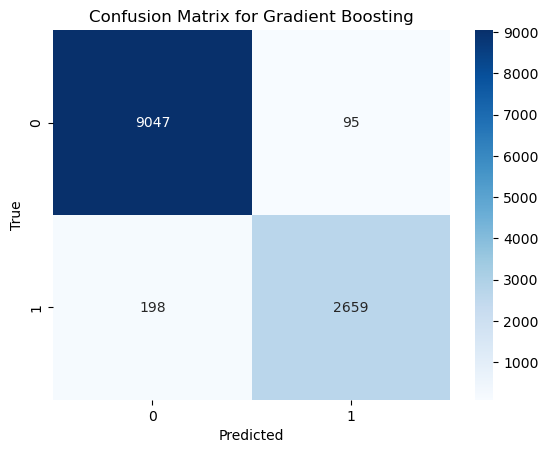

In [88]:
def plot_confusion_matrix(model, X, y, name):
    y_pred = cross_val_predict(model, X, y, cv=5)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
# Logistic Regression
plot_confusion_matrix(logreg, X_train, y_train, 'Logistic Regression')

# Random Forest
plot_confusion_matrix(rf_classifier, X_train, y_train, 'Random Forest')

# Gradient Boosting
plot_confusion_matrix(gb_classifier, X_train, y_train, 'Gradient Boosting')

__6.3.	From the confusion matrix, explain which metric needs to be used - Recall or Precision?__

__Observation:__

Based on the evaluation of performance metrics where the Random Forest algorithm shows a higher F1-Score, Recall, and Precision, it is recommended to use this algorithm for scenarios where both the accuracy of the positive predictions and the completeness of the positive class detection are critical. 

Its ability to deliver balanced results across diverse conditions makes it an optimal choice for our current and future modeling needs. 

The decision to implement Random Forest should be seen as a strategic move to enhance the predictive power of our models while ensuring reliability and accuracy in our predictions.

## Step 7: Suggest various retention strategies for targeted employees.

__7.1. Using the best model, predict the probability of employee turnover in the test data.__

In [121]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

#Predict the probability of employee turnover in the test data
probabilities = best_model.predict_proba(X_test)[:, 1]

probabilities[:10] 

array([0.  , 0.42, 0.01, 0.  , 0.01, 0.03, 0.01, 0.  , 0.02, 0.  ])

__7.2. Categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.__

In [124]:
#Define the zone boundaries
zone_boundaries = {
    'Safe Zone (Green)': (0, 0.2),
    'Low Risk Zone (Yellow)': (0.2, 0.6),
    'Medium Risk Zone (Orange)': (0.6, 0.9),
    'High Risk Zone (Red)': (0.9, 1) }

def categorize_zone(score):
    for zone, (lower_bound, upper_bound) in zone_boundaries.items():
        if lower_bound <= score <= upper_bound:
            return zone
    return 'Unknown Zone'

zones = pd.Series(probabilities).apply(categorize_zone)

#Count the number of employees in each zone
zone_counts = zones.value_counts().sort_index()

zone_counts

High Risk Zone (Red)          633
Low Risk Zone (Yellow)         55
Medium Risk Zone (Orange)      63
Safe Zone (Green)            2249
Name: count, dtype: int64

__Observations:__

__High Risk Zone (Red)__

Retention strategies in the High Risk Zone should be robust and comprehensive. The focus should be on:

- Intensive Interventions: Implement the most intensive and immediate interventions to reduce risk as quickly as possible.
    
- Support and Incentives: Provide support to employees, such as financial incentives, to encourage adherence to safety measures.
    
- Regular Communication: Maintain clear and consistent communication channels to inform and educate about the risks and the steps being taken to mitigate them.
    
__Medium Risk Zone (Orange)__

For the Medium Risk Zone, retention strategies should aim to prevent escalation through:

- Proactive Measures: Employ proactive measures to address known risks before they become critical.

- Targeted Education and Training: Offer education and training to build awareness of the risks, and knowledge on how to reduce them.
    
- Monitoring and Evaluation: Regularly monitor risk levels and the effectiveness of implemented strategies and making adjustments where necessary.

__Low Risk Zone (Yellow)__

In Low Risk Zones, retention strategies should focus on maintaining the current risk level through:

- Preventive Practices: Encourage preventive practices to ensure that risks do not increase.

- Community Engagement: Engage with the community to foster a culture of safety and awareness.

- Early Warning Systems: Have early warning systems in place to detect any rise in risk levels early.

__Safe Zone (Green)__

Finally, in the Safe Zone, the aim is to sustain the low-risk status through:

- Continuous Risk Assessment: Conduct ongoing risk assessments to ensure that the zone remains safe.

- Best Practices: Reinforce and share best practices that have helped to maintain the low-risk status.

- Resilience Building: Focus on building resilience to potential risks to prevent future threats from impacting the zone's safety.